In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
claim = pd.read_csv("C:/Users/shubh dwivedi/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [5]:
cust_demo = pd.read_csv("C:/Users/shubh dwivedi/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [6]:
cust_demo.rename(columns={'CUST_ID':'customer_id'},inplace=True)

In [7]:
cust_demo

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [8]:
df = pd.merge(left=cust_demo,right=claim,on='customer_id',how = 'outer' )

In [10]:
df

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,14818669,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,85322831,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,73449366,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


### 2 - Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [11]:
df.dtypes

customer_id              int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [12]:
df['DateOfBirth']= pd.to_datetime(df['DateOfBirth'])

In [13]:
df.dtypes

customer_id                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [14]:
df

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [15]:
df["claim_date"] = pd.to_datetime(df.claim_date, format = "%m/%d/%Y")
df["Contact"] = pd.to_numeric(df.Contact.str.replace("-",""),downcast='float')


In [16]:
df.dtypes

customer_id                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

### 3 - . Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [17]:
df['claim_amount'] = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')

C:\Users\shubh dwivedi\AppData\Local\Temp\ipykernel_14144\207756445.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['claim_amount'] = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')


In [18]:
df.dtypes

customer_id                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

In [19]:
df

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No


### 4 - Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [20]:
df['alaer_flag']= np.where(df['police_report']=='Unknown',1,0)

In [21]:
df

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alaer_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,1


### 5 - One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [22]:
df = df.groupby('customer_id').first().reset_index(drop = True)

In [23]:
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alaer_flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0
1,Male,2072-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,1
3,Male,2071-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,0
1096,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0
1097,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0
1098,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0


### 6 - Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [24]:
df.isna().sum()

gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alaer_flag              0
dtype: int64

In [25]:
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean())
df['total_policy_claims'] = df['total_policy_claims'].fillna(df['total_policy_claims'].mode()[0])
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alaer_flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.729492,1.0,Yes,0
1,Male,2072-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1
3,Male,2071-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0
1096,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,0
1097,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0
1098,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0


### 7 - Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [26]:
df["Age"] = (pd.DatetimeIndex(df.claim_date).year - pd.DatetimeIndex(df.DateOfBirth).year)
df.loc[(df.Age < 18) & (df.Age >0),'Age_Group'] = 'Children'
df.loc[(df.Age >=18) & (df.Age <30),'Age_Group'] = 'Youth'
df.loc[(df.Age >=30) & (df.Age <60),'Age_Group'] = 'Adult'
df.loc[(df.Age >=60),'Age_Group'] = 'Senior'
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alaer_flag,Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.729492,1.0,Yes,0,40.0,Adult
1,Male,2072-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,-54.0,NaN
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1,29.0,Youth
3,Male,2071-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0,-53.0,NaN
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0,-47.0,NaN
1096,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,0,-48.0,NaN
1097,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0,-45.0,NaN
1098,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0,22.0,Youth


In [27]:
df.dropna(inplace=True)

In [28]:
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alaer_flag,Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.729492,1.0,Yes,0,40.0,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1,29.0,Youth
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,38.0,Adult
5,Male,1994-12-17,AR,9.631873e+09,Platinum,7180084.0,Crime,2018-07-14,Auto,No,Material only,2630.000000,1.0,No,0,24.0,Youth
6,Male,1977-08-03,AK,6.133853e+09,Gold,7238381.0,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,0,41.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,Female,1993-11-11,ID,8.234826e+09,Platinum,17871003.0,Other driver error,2018-09-19,Auto,Unknown,Material only,3139.500000,3.0,Yes,1,25.0,Youth
1092,Female,1985-12-30,KY,7.644400e+09,Gold,74165873.0,Other driver error,2018-01-13,Home,No,Material only,1495.000000,1.0,Yes,0,33.0,Adult
1094,Male,1993-08-03,OH,5.344353e+09,Platinum,1249826.0,Other driver error,2017-01-21,Auto,No,Material only,2260.000000,1.0,No,0,24.0,Youth
1098,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0,22.0,Youth


### 8 - What is the average amount claimed by the customers from various segments?


In [29]:
df.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12868.188477
1,Platinum,12632.058594
2,Silver,12743.126953


### 9 - What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [30]:
df[df.claim_date < "2018-09-10"].groupby('incident_cause')['claim_amount'].mean().reset_index()

,incident_cause,claim_amount
0,Crime,8026.003418
1,Driver error,14972.566406
2,Natural causes,7372.779297
3,Other causes,14358.389648
4,Other driver error,14676.504883


### 10 -  How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [32]:
df.loc[(df.incident_cause.str.lower().str.contains("driver") & ((df.State == "TX") | (df.State == "DE") | (df.State == "AK"))),:].groupby("State")["State"].count()


State
AK     8
DE    11
TX     7
Name: State, dtype: int64

### 11 -  Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [33]:
pie = df.groupby(['gender','Segment'])['claim_amount'].mean().reset_index()

array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

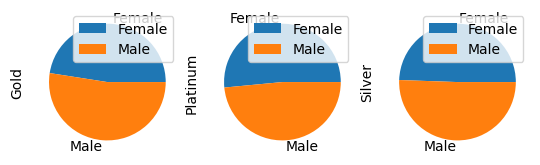

In [36]:
pie.pivot(index='gender',columns='Segment',values='claim_amount').plot(kind = 'pie',subplots=True)

### 12 - Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [37]:
bar = df[(df.incident_cause.str.lower().str.contains("driver", na=False))].groupby(["gender"])[["gender"]].count().add_prefix("count_").reset_index()


<AxesSubplot:xlabel='gender'>

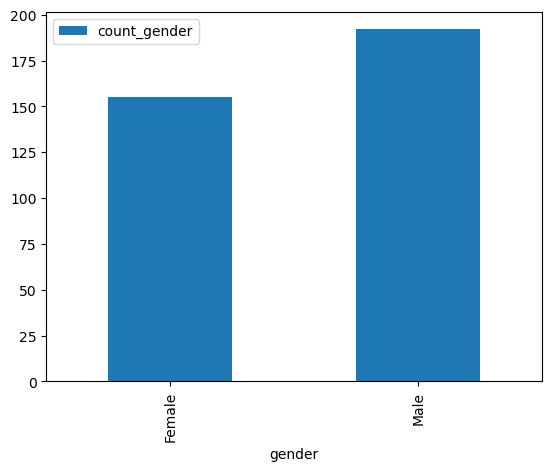

In [38]:
pd.pivot_table(bar,index="gender",values="count_gender").plot(kind = "bar")

###  13 - Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


<AxesSubplot:xlabel='Age_Group'>

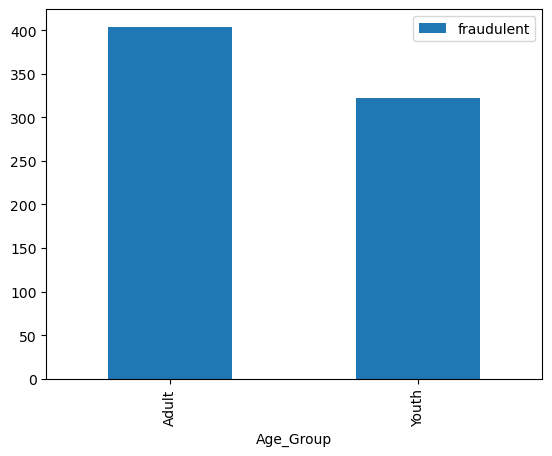

In [39]:
bar2 = df.groupby('Age_Group')['fraudulent'].count().reset_index()
pd.pivot_table(bar2,index="Age_Group",values="fraudulent").plot(kind = "bar")

### 14 - Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

<AxesSubplot:xlabel='Month_num'>

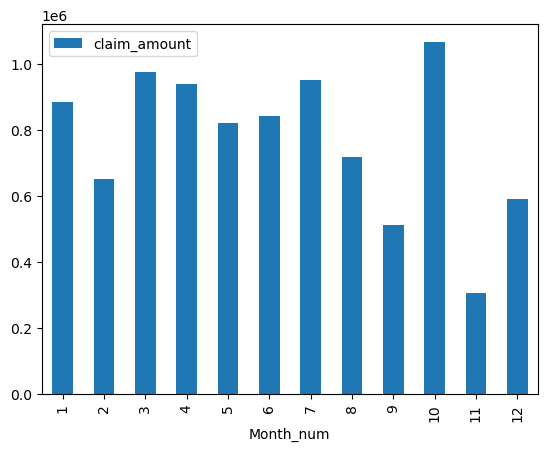

In [40]:
df['Month_num'] = pd.DatetimeIndex(df.claim_date).month
trend = df.groupby('Month_num')['claim_amount'].sum().reset_index()
pd.pivot_table(trend,index='Month_num',values="claim_amount").plot(kind = "bar")

### 15 - What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

array([<AxesSubplot:title={'center':'Fraud_claim_amount'}, xlabel='gender,Age_Group'>,
       <AxesSubplot:title={'center':'Non_Fraud_claim_amount'}, xlabel='gender,Age_Group'>],
      dtype=object)

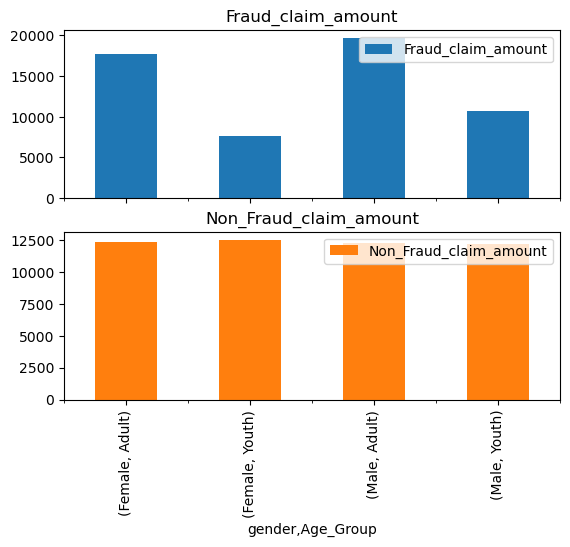

In [41]:
f = df[(df.fraudulent=="Yes")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Fraud_")
nf = df[(df.fraudulent=="No")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")
f_nf=round(pd.merge(f,nf,on=["gender","Age_Group"]),2)
f_nf.plot(kind="bar", subplots= True, legend= True)

### 16 -  Is there any similarity in the amount claimed by males and females?


In [42]:
# Two sample t-test:
# Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
# Data in each group must be obtained via a random sample from the population.
# Data in each group are normally distributed.
# Data values are continuous.
# The variances for the two independent groups are equal.
import scipy.stats as st
female = df['claim_amount'].loc[df['gender']=="Female"]
male = df['claim_amount'].loc[df['gender']=="Male"]
st.ttest_ind(female, male, equal_var=False)
# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

Ttest_indResult(statistic=-0.28402368773909625, pvalue=0.7764734712657048)

### 17 -  Is there any relationship between age category and segment ?

In [43]:
# Chi Square test:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
c = pd.crosstab(df.Age_Group, df.Segment, margins = True)
st.chi2_contingency(observed= c)
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age categorty and segment

(2.107804020277403,
 0.9095215329173473,
 6,
 array([[140.78787879, 136.89256198, 126.31955923, 404.        ],
        [112.21212121, 109.10743802, 100.68044077, 322.        ],
        [253.        , 246.        , 227.        , 726.        ]]))

### 18 - The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [44]:
# Correlation
df['year'] = pd.DatetimeIndex(df.claim_date).year
CY = df.loc[df.year == 2018]["claim_amount"]
PY = df.loc[df.year == 2017]["claim_amount"]
CY.corr(other= PY)
# There is no correlation between Current Year and Previous year

nan

### 19 - Is there any difference between age groups and insurance claims?

In [45]:
# ANOVA:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
a1 = df['total_policy_claims'].loc[df['Age_Group']=="Youth"]
a2 = df['total_policy_claims'].loc[df['Age_Group']=="Adult"]
st.f_oneway(a1,a2)
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims

F_onewayResult(statistic=0.754169713956391, pvalue=0.3854470480908718)

### 20 - Is there any relationship between total number of policy claims and the claimed amount?


In [46]:
# Correlation
df.total_policy_claims.corr(other= df.claim_amount)
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.

-0.0016917940611994018